# An SVM Analysis on Student Alcohol Consumption Data

### Background and Problem to be Solved

Alcohol consumption can have many short-term and long-term side effects on young people’s health and bad consequences on life and academic performance. From 1998 through 2005, 1,825 college students between the ages of 18 and 24 die from alcohol-related unintentional injuries, including motor-vehicle crashes.1 Alcohol use is also the major cause of sexual assaults on campus. Students who drink heavily are reported to have poorer performance on a test and high absence rate. 2 For many of us, adolescence is the point when we become independent person and make crucial decisions on our own. I would like to identify the factors that impact the students’ school performance, especially to check if alcohol use will affect students’ grades, with support of real-world data.
 
This project investigates techniques for regression problems and create models that can predict students’ academic performance. Regression is a major type of supervised machine learning (the other is classification). The goal for regression problems is to predict continuous number given a list of attributes. In this project, I will use students’ social characters and alcohol consumption as inputs to predict their academic performance measured in the final grade of Math, Portuguese, or the average of both.

### Data

The data is collected by Fabio Pagnotta and Hossain Mohammad Amran3,4 from University of Camerino. The data can be accessed through UCI Machine Learning Repository:
 
https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION
 
The data covers alcohol usage of a group of students under secondary education in Portugal along with their social, gender, study time, and school performance information. The dataset consists of two subdatasets with contributes for both Math (student-mat.csv) and Portuguese language (tudent-por.csv) classes. Each dataset has 32 variables with detailed explanation in “student.txt”. There are several (382) students that belong to both datasets.

Below is the description of variables loaded from "students.txt".

    Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
    1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
    2 sex - student's sex (binary: "F" - female or "M" - male)
    3 age - student's age (numeric: from 15 to 22)
    4 address - student's home address type (binary: "U" - urban or "R" - rural)
    5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
    6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
    7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
    10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
    11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
    12 guardian - student's guardian (nominal: "mother", "father" or "other")
    13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    16 schoolsup - extra educational support (binary: yes or no)
    17 famsup - family educational support (binary: yes or no)
    18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    19 activities - extra-curricular activities (binary: yes or no)
    20 nursery - attended nursery school (binary: yes or no)
    21 higher - wants to take higher education (binary: yes or no)
    22 internet - Internet access at home (binary: yes or no)
    23 romantic - with a romantic relationship (binary: yes or no)
    24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    29 health - current health status (numeric: from 1 - very bad to 5 - very good)
    30 absences - number of school absences (numeric: from 0 to 93)

    These grades are related with the course subject, Math or Portuguese:
    31 G1 - first period grade (numeric: from 0 to 20)
    31 G2 - second period grade (numeric: from 0 to 20)
    32 G3 - final grade (numeric: from 0 to 20, output target)

### Data Wrangling

In order to explore any patterns of factors may associated with students’ school performance, I combined the two subdatasets. To avoid the case that same students may appeared twice in the merged datasets, I firstly identified a sub dataset of students that belong to both datasets. G3, the final grade related with the course subject, Math or Portuguese, is used as the indicator of the students’ school performance. For students who took both courses, the average score of the two courses is calculated and being used. 
 
Next, I concatenated three sub datasets of students that took Math only, students that took Portuguese only, and students that took both, generating an initial input dataset. 

New variables created: 
 
    “Subject” - measures which course a student was taking. (“M” - Math, “P” - Portuguese, and “B”- both)
 
    “Course”  -  measures how many course a student was taking. (1 - one course, and 2 - two courses)
 
    “Aalc” - measures daily alcohol consumption was generated using formula Aalc = (Dalc*5 + Walc*2)/7. (Dalc - workday alcohol consumption. Walc - weekend alcohol consumption)

Any variables that irrelevant to the study were dropped: 

    They are “G1”, “G2”, “paid”, “Dalc”, and “Walc”. 
 
In the new preprocessed data “INPUTdf”, the sum of missing data for each column is zero, meaning there is no missing values. 
 
By looking into histograms of G3 and Aalc, the two major continuous variables in the dataset, there is also no outliers. 

### EDA and Summary Statistics

The target variable, G3, the average final score, falls in the range between 0 and 18.5, with an average value of 11.25. The histogram reveals that the sample distribution is close to normal. 

Bias was generated with the calculation of G3:
 
    For students who only took one of the two classes, G3 can only reflect the performance of the single class they were taking. The final score of one class makes less sense to another, meaning G3_M is not fully comparable to G3_P. From a Seaborn style scatter plot of Subject and G3, it shows that students who took Portuguese class only in general have a lower G3.
 
    For students who took two classes and used the average of final scores, a measurement bias was generated because a student may be good at one subject or another. A student is always better off by taking one the two classes that he or she is better at.


By plotting the histogram of Aalc, the students’ daily alcohol consumption level, I notice that most students consumed very low levels of alcohol. To study the effect of alcohol use, it may be worth looking into the subset of data with students who had severe alcohol use.

No visual relationship has been observed from the plot between time of study and G3, while students number of past failures negatively associated with G3, as reflected in the failures vs G3 scatter plot. Students who didn’t want to take higher education were also unlikely to get higher G3, as shown in scatter plot of higher vs G3. Plotting G3 over absences, it shows a negative correlation.

### Data Preparation for Modeling
The target variable (y) is G3. I include all rest variables as  predictors (X). 
 
For binary variables from the original datasets, I replaced “yes”/”no” values with 1/0. The converted variables are listed in below.
school - student's school (1 - Gabriel Pereira or 0 - Mousinho da Silveira)

    sex - student's sex (1 - female or 0 - male).
    address - student's home address type (1 - urban or 0 - rural).
    famsize - family size (1 - less or equal to 3 or 0 - greater than 3).
    Pstatus - parent's cohabitation status (1- living together or 0 - apart).
    schoolsup - extra educational support (1- yes or 0 - no).
    famsup - family educational support (1- yes or 0 - no).
    activities - extra-curricular activities (1- yes or 0 - no).
    nursery - attended nursery school (1- yes or 0 - no).
    higher - wants to take higher education (1- yes or 0 - no).
    internet - Internet access at home (1- yes or 0 - no).
    romantic - with a romantic relationship (1- yes or 0 - no).
 
Next, I dummy coded any nominal categorical variables in X. This will improve SVM performance by eliminating any relationships form the statistical stories of nominal variables. 
Nominal variables are listed as the following. 
 
    Subject - The course a student was taking. (“M” - Math, “P” - Portuguese, and “B”- both).
    Mjob - mother's job ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other").
    Fjob - father's job ( "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other").
    reason - reason to choose this school (close to "home", school "reputation", "course" preference or "other").
    guardian - student's guardian ( "mother", "father" or "other").
    
In the modeling process, I build a model on the training data and then to make predictions on the test data that has the same features as the training set that we used. The goal is to build a model that is able to generalize from training set to test set as accurately as possible. 
SVM model is very sensitive to the scaling of the data. There are several methods to transform the data that yield more standard ranges. In this project, I will choose one from below that optimize the model accuracy.

    The StandardScaler ensures that for each feature the mean is 0 and the variance is 1.
    The RobustScaler removes the median and scales the data according to quantile range. Thus it is robust to outliers.
    The MinMaxScaler shifts the data such that all features are exactly between 0 and 1.
    The Normalizer scales each point that the feature vector has a Euclidean length of 1.

In particular, I scaled the non-dummy variables in training dataset, and combined them with dummy variables in the training data set. I followed the same steps to the test dataset. So the datasets are ready for initial modeling. 

### SVR Model

In this project, I use supported vector machines (SVMs) to analyze the regression problem. For regression tasks, the goal is to predict a continuous number, in this case G3, using the given features. In this algorithm, we plot each data point in an n-dimensional space, where n is number of features. 
 
The SVR uses the same principles as SVM for classification, by maintaining all the main features that maximize the margin. Linear models are limited to low-dimensional spaces. By using kernel tricks (by directly computing the distance),  we can take low dimensional input space and transform it to a higher dimensional space. The two common ways are polynomial kernel and radial basis function (RBF) kernel, or Gaussian kernel. In this project, I will use RBF. Two parameters are considered when training VVM with RBF kernel: C and gamma. C trades off misclassification against the simplicity of the supported vectors. Gamma measures how much influence a single training point has. 
 
I grid search the optimal performance given a range of C and gamma. 
gamma ∈  [1e-3,1e-1,1e0,1e1,1e10,1e50]
C ∈ [1e-3,1e-1,1e0,1e1,1e10,1e50]
 
The score function returns the coefficient of determination R^2 of the prediction. Train score and test score are calculated and reported. In addition, I also use 5-fold cross-validation and average the scores. The C and gamma that gives the highest average cross validation score (0.22) are chosen for the SVR model (gamma = 0.1, C=1e1).
 

### Discussion and Future Work

The highest average cross validation of 0.22 suggest the accuracy of the model is not sufficient. Various factors can be considered. The target variable, G3, has a high bias and high noise level. The predictor variables may be cross correlated. There is week connection between features and G3. The 2D scatterplots of the slightly week trend also indicate lack of predictability of the data itself. 

# Code

In [1]:
#Import modules
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import cross_validation
from sklearn import datasets
from sklearn.svm import SVR
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score

/Users/Jing/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Load data into Mdf and Pdf
Mdf = pd.read_csv('student-mat.csv',sep=';')
Pdf = pd.read_csv('student-por.csv',sep=';')

In [3]:
#Add a column "Subject" that describes which course the student has taken
Mdf['Subject'] = 'M'
Pdf['Subject'] = 'P'

In [4]:
#Identify students who took both Math and Portuguese classes
df = pd.merge(Mdf,Pdf,on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], suffixes=('_M','_P'))

In [5]:
#In df, replace G3 with new_G3, average score of Math and Portuguese 
df.loc[:,'new_G3'] = (df.G3_M + df.G3_P)/2
#Merge df back with Mdf, so we have a dataset (Mdf4) for students who take math only and who take both classes
Mdf2 = df.drop(['guardian_P', 'traveltime_P',
       'studytime_P', 'failures_P', 'schoolsup_P', 'famsup_P', 'paid_P',
       'activities_P', 'higher_P', 'romantic_P', 'famrel_P', 'freetime_P',
       'goout_P', 'Dalc_P', 'Walc_P', 'health_P', 'absences_P', 'G1_P', 'G2_P',
       'G3_P', 'Subject_P'], axis=1)
Mdf2.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3', 'Subject', 'new_G3']
Mdf3 = pd.concat([Mdf, Mdf2])
Mdf3[['G3','new_G3']]
Mdf4 = Mdf3.drop_duplicates(['Dalc', 'Fedu', 'Fjob', 'G1', 'G2', 'G3', 'Medu', 'Mjob', 'Pstatus',
       'Subject', 'Walc', 'absences', 'activities', 'address', 'age',
       'failures', 'famrel', 'famsize', 'famsup', 'freetime', 'goout',
       'guardian', 'health', 'higher', 'internet', 'nursery', 'paid',
       'reason', 'romantic', 'school', 'schoolsup', 'sex', 'studytime',
       'traveltime'], keep='last')
#For students taking two classes, update Subject value as "B"
Mdf4.Subject = np.where(Mdf4.new_G3.isnull(), Mdf4.Subject, 'B')
#For students only taking Math, the average score (new_G3) is their Math score (G3)
Mdf4.new_G3 = np.where(Mdf4.new_G3.isnull(), Mdf4.G3, Mdf4.new_G3)
#Drop G3
Mdf4 = Mdf4.drop('G3', axis=1)
#Rename new_G3 as G3
Mdf4 = Mdf4.rename(columns = {'new_G3':'G3'})

/Users/Jing/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
#Identify students who took Portuguese class only as Pdf4
#In df (students taking two classes), select columns coming from Pdf and rename columns
Pdf2 = df.drop(['guardian_M', 'traveltime_M', 'studytime_M',
       'failures_M', 'schoolsup_M', 'famsup_M', 'paid_M', 'activities_M',
       'higher_M', 'romantic_M', 'famrel_M',
       'freetime_M', 'goout_M', 'Dalc_M', 'Walc_M', 'health_M', 'absences_M',
       'G1_M', 'G2_M', 'G3_M', 'Subject_M'], axis=1)
Pdf2.columns = (['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'higher', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3', 'Subject', 'new_G3'])
#Merge Pdf2 back to Pdf, resulting students taking Portuguese class only, and students taking two classes (appeared twice)
#Fully drop duplicates (students taking two classes)
Pdf4 = pd.concat([Pdf, Pdf2]).drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], keep=False)
#Drop new_G3
Pdf4 = Pdf4.drop('new_G3', axis=1)

In [7]:
#Concatenate Mdf4 and Pdf4 as INPUTdf
#INPUTdf has unique student info per record/row
INPUTdf = pd.concat([Mdf4,Pdf4])

In [8]:
#Create a variable "Aalc" measuring average alcohol daily consumption
INPUTdf.loc[:, 'Aalc'] = (INPUTdf['Dalc']*5 + INPUTdf['Walc']*2)/7

In [9]:
#Drop variables not interested
INPUTdf = INPUTdf.drop(['G1', 'G2', 'paid', 'Dalc', 'Walc'], axis=1)

In [10]:
#print the first five rows of INPUTdf
INPUTdf.head()

,Fedu,Fjob,G3,Medu,Mjob,Pstatus,Subject,absences,activities,address,...,internet,nursery,reason,romantic,school,schoolsup,sex,studytime,traveltime,Aalc
128,2,other,0.0,2,services,T,M,0,yes,R,...,yes,yes,reputation,no,GP,no,M,1,1,1.285714
161,2,other,7.0,3,other,T,M,6,no,R,...,yes,yes,course,yes,GP,yes,M,2,2,1.857143
162,2,other,0.0,1,other,T,M,0,yes,U,...,no,yes,course,no,GP,no,M,1,2,2.571429
163,3,services,10.0,1,at_home,T,M,2,no,U,...,yes,yes,course,no,GP,no,M,1,1,1.857143
165,2,services,12.0,3,services,T,M,16,yes,U,...,no,no,course,no,GP,no,M,1,2,1.000000


In [11]:
#check if any missing values in the dataset
INPUTdf.isnull().sum()

Fedu          0
Fjob          0
G3            0
Medu          0
Mjob          0
Pstatus       0
Subject       0
absences      0
activities    0
address       0
age           0
failures      0
famrel        0
famsize       0
famsup        0
freetime      0
goout         0
guardian      0
health        0
higher        0
internet      0
nursery       0
reason        0
romantic      0
school        0
schoolsup     0
sex           0
studytime     0
traveltime    0
Aalc          0
dtype: int64

In [12]:
INPUTdf.describe()

,Fedu,G3,Medu,absences,age,failures,famrel,freetime,goout,health,studytime,traveltime,Aalc
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,2.300151,11.251885,2.497738,4.926094,16.817496,0.336350,3.941176,3.182504,3.171946,3.532428,1.923077,1.562594,1.728291
std,1.097422,3.396047,1.130293,6.853823,1.267129,0.722945,0.934975,1.060779,1.162349,1.434919,0.827288,0.742691,0.934679
min,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,9.500000,2.000000,0.000000,16.000000,0.000000,4.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,2.000000,11.000000,2.000000,3.000000,17.000000,0.000000,4.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.285714
75%,3.000000,13.500000,4.000000,8.000000,18.000000,0.000000,5.000000,4.000000,4.000000,5.000000,2.000000,2.000000,2.214286
max,4.000000,18.500000,4.000000,75.000000,22.000000,3.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000


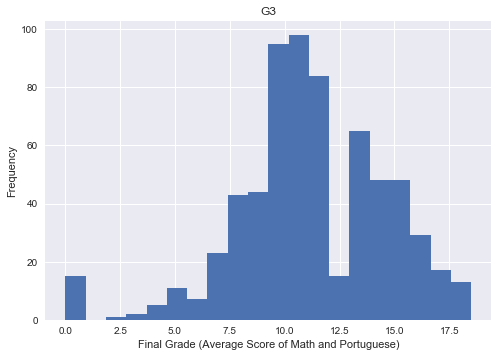

In [13]:
plt.hist(INPUTdf['G3'], bins=20)
plt.xlabel('Final Grade (Average Score of Math and Portuguese)')
plt.ylabel('Frequency')
plt.title('G3')

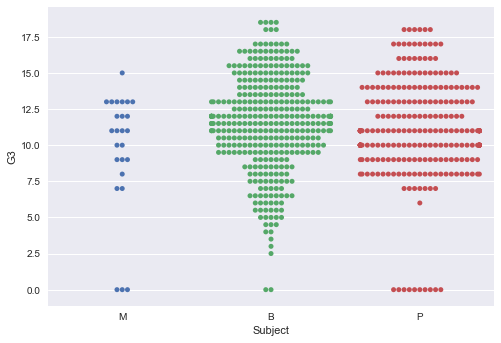

In [14]:
sns.swarmplot(x="Subject", y="G3", data=INPUTdf)

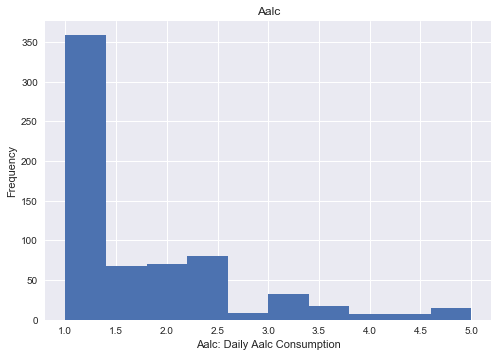

In [15]:
plt.hist(INPUTdf['Aalc'], bins=10)
plt.xlabel('Aalc: Daily Aalc Consumption')
plt.ylabel('Frequency')
plt.title('Aalc')

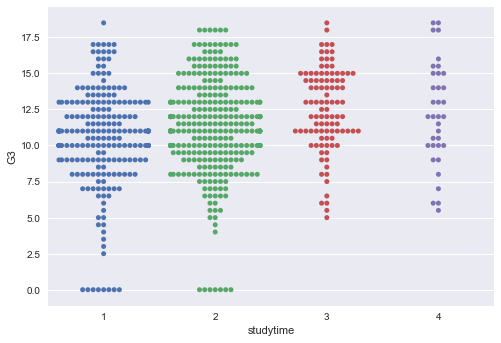

In [16]:
sns.swarmplot(x="studytime", y="G3", data=INPUTdf)

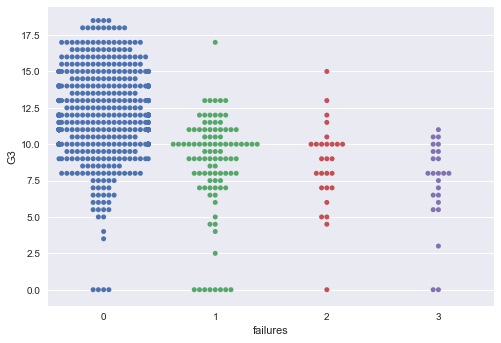

In [17]:
sns.swarmplot(x="failures", y="G3", data=INPUTdf)

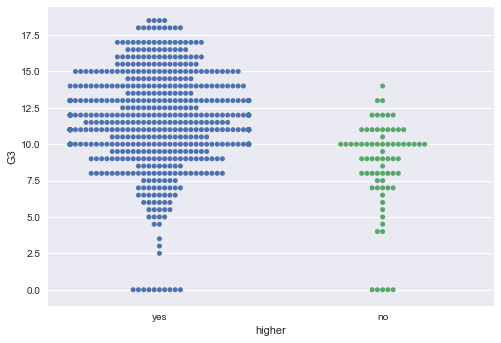

In [18]:
sns.swarmplot(x="higher", y="G3", data=INPUTdf)

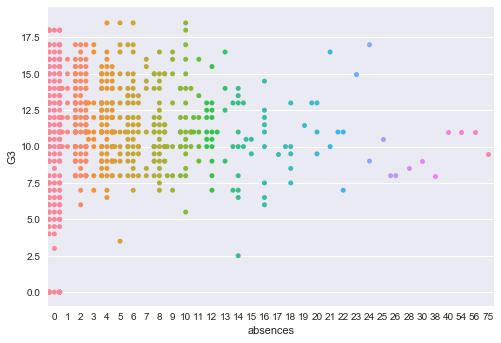

In [19]:
sns.swarmplot(x="absences", y="G3", data=INPUTdf)

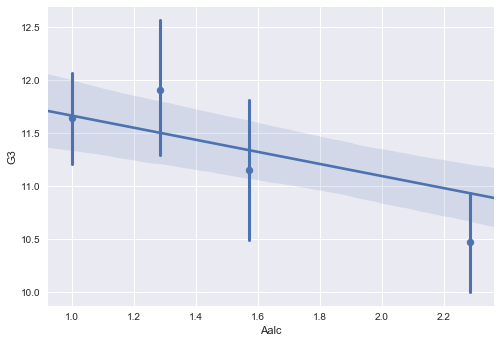

In [20]:
sns.regplot(x="Aalc", y="G3", data=INPUTdf, x_bins=4)

### Data Preparation for Modeling

In [21]:
#Identify target variable (y) and predictor variables(X)
y = INPUTdf['G3']
X = INPUTdf[['Fedu','Fjob', 'Medu', 'Mjob', 'Pstatus', 'Subject', 'absences',
       'activities', 'address', 'age', 'failures', 'famrel', 'famsize',
       'famsup', 'freetime', 'goout', 'guardian', 'health', 'higher',
       'internet', 'nursery', 'reason', 'romantic', 'school', 'schoolsup',
       'sex', 'studytime', 'traveltime', 'Aalc']]

In [22]:
#Convert dummy variables values into 0/1
X.school = X['school'].replace(['GP', 'MS'], [1,0])
X.sex = X['sex'].replace(['F','M'],[1,0])
X.address = X['address'].replace(['U','R'], [1,0])
X.famsize = X['famsize'].replace(['LE3','GT3'], [1,0])
X.Pstatus = X['Pstatus'].replace(['T','A'], [1,0])
X.schoolsup = X['schoolsup'].replace(['yes','no'],[1,0])
X.famsup = X['famsup'].replace(['yes','no'],[1,0])
X.activities = X['activities'].replace(['yes','no'],[1,0])
X.nursery = X['nursery'].replace(['yes','no'],[1,0])
X.higher = X['higher'].replace(['yes','no'],[1,0])
X.internet = X['internet'].replace(['yes','no'],[1,0])
X.romantic = X['romantic'].replace(['yes','no'],[1,0])

/Users/Jing/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
#Identify norminal variables
norminal_vars = ['Fjob', 'Mjob', 'Subject', 'reason','guardian']
#Convert norminal variables to dummy variables
X = pd.get_dummies(X, columns= norminal_vars)
# Show the dummy coded dataframe
X.head()

,Fedu,Medu,Pstatus,absences,activities,address,age,failures,famrel,famsize,...,Subject_B,Subject_M,Subject_P,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
128,2,2,1,0,1,0,18,2,3,0,...,0,1,0,0,0,0,1,0,1,0
161,2,3,1,6,0,0,15,2,4,0,...,0,1,0,1,0,0,0,0,1,0
162,2,1,1,0,1,1,16,1,4,1,...,0,1,0,1,0,0,0,0,1,0
163,3,1,1,2,0,1,17,0,5,0,...,0,1,0,1,0,0,0,1,0,0
165,2,3,1,16,1,1,16,1,4,0,...,0,1,0,1,0,0,0,0,1,0


In [24]:
#check data types for each variable
X.dtypes

Fedu                   int64
Medu                   int64
Pstatus                int64
absences               int64
activities             int64
address                int64
age                    int64
failures               int64
famrel                 int64
famsize                int64
famsup                 int64
freetime               int64
goout                  int64
health                 int64
higher                 int64
internet               int64
nursery                int64
romantic               int64
school                 int64
schoolsup              int64
sex                    int64
studytime              int64
traveltime             int64
Aalc                 float64
Fjob_at_home           uint8
Fjob_health            uint8
Fjob_other             uint8
Fjob_services          uint8
Fjob_teacher           uint8
Mjob_at_home           uint8
Mjob_health            uint8
Mjob_other             uint8
Mjob_services          uint8
Mjob_teacher           uint8
Subject_B     

In [25]:
X.columns

Index(['Fedu', 'Medu', 'Pstatus', 'absences', 'activities', 'address', 'age',
       'failures', 'famrel', 'famsize', 'famsup', 'freetime', 'goout',
       'health', 'higher', 'internet', 'nursery', 'romantic', 'school',
       'schoolsup', 'sex', 'studytime', 'traveltime', 'Aalc', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Subject_B', 'Subject_M', 'Subject_P', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [26]:
#Split data set into trainData and testData
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [27]:
#Split X_train and X_test into sub dataframes consists of dummy columns only and non-dummy columns only
X_train_nondummies = X_train[['Fedu', 'Medu', 'absences',  'age',
       'failures', 'famrel', 'freetime', 'goout',
       'health', 'studytime', 'traveltime', 'Aalc']]
X_train_dummies = X_train[['Pstatus','activities', 'address','famsize', 'famsup','higher', 'internet', 'nursery', 'romantic', 'school',
       'schoolsup', 'sex', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Subject_B', 'Subject_M', 'Subject_P', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other']]
X_test_nondummies = X_test[['Fedu', 'Medu', 'absences',  'age',
       'failures', 'famrel', 'freetime', 'goout',
       'health', 'studytime', 'traveltime', 'Aalc']]
X_test_dummies = X_test[['Pstatus','activities', 'address','famsize', 'famsup','higher', 'internet', 'nursery', 'romantic', 'school',
       'schoolsup', 'sex', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Subject_B', 'Subject_M', 'Subject_P', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other']]

In [28]:
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()]
scalers

[StandardScaler(copy=True, with_mean=True, with_std=True),
 MinMaxScaler(copy=True, feature_range=(0, 1)),
 RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
        with_scaling=True),
 Normalizer(copy=True, norm='l2')]

In [29]:
#scale the training and test sets using StandardScaler
scaler = scalers[0]
scaler.fit(X_train_nondummies)

X_train_nondummies_standard = scaler.transform(X_train_nondummies)
X_train_standard = np.concatenate((X_train_nondummies_standard, X_train_dummies.values), axis=1)

X_test_nondummies_standard = scaler.transform(X_test_nondummies) 
X_test_standard= np.concatenate((X_test_nondummies_standard, X_test_dummies.values), axis=1)

### SVR Analysis and Results

Initial SVR Model and Tuning

In [33]:
score = pd.DataFrame(columns=['gamma','C','train_score','test_score','cv1', 'cv2', 'cv3', 'cv4', 'cv5','cv_avg'])
for gamma in [1e-3,1e-1,1e0,1e1,1e10,1e50]:
    for C in [1e-3,1e-1,1e0,1e1,1e10,1e50]:
        svm = SVR(kernel='rbf', gamma=gamma, C=C)
        svm.fit(X_train_standard, y_train)
        train_score = svm.score(X_train_standard, y_train)
        test_score = svm.score(X_test_standard, y_test)
        cv_score = cross_val_score (svm, X_train_standard, y_train, cv=5)
        row = pd.Series({'gamma':gamma, 'C':C, 'train_score':train_score,'test_score':test_score,'cv1':cv_score[0], 'cv2':cv_score[1], 'cv3':cv_score[2], 'cv4':cv_score[3], 'cv5':cv_score[4], 'cv_avg': cv_score.mean()})
        score = score.append(row, ignore_index=True)
score.sort_values(by='cv_avg', ascending=False, inplace=True)
score.head()

,gamma,C,train_score,test_score,cv1,cv2,cv3,cv4,cv5,cv_avg
9,0.100,1.000000e+01,0.974312,0.260012,0.316065,0.239906,0.084873,0.177174,0.259913,0.215586
10,0.100,1.000000e+10,0.999102,0.239353,0.307861,0.249073,0.078932,0.172524,0.243581,0.210394
11,0.100,1.000000e+50,0.999102,0.239353,0.307861,0.249073,0.078932,0.172524,0.243581,0.210394
3,0.001,1.000000e+01,0.249127,0.208409,0.245470,0.186687,0.132649,0.112275,0.201621,0.175740
8,0.100,1.000000e+00,0.457197,0.211895,0.212466,0.169736,0.125519,0.118111,0.194993,0.164165


SVR based on "Subject" (M, P, and B)

In [34]:
X_M = X.loc[X['Subject_M']==1]
X_P = X.loc[X['Subject_P']==1]
X_B = X.loc[X['Subject_B']==1]

y_M = INPUTdf.loc[INPUTdf['Subject']=='M', 'G3']
y_P = INPUTdf.loc[INPUTdf['Subject']=='P', 'G3']
y_B = INPUTdf.loc[INPUTdf['Subject']=='B', 'G3']

X_M_train, X_M_test, y_M_train, y_M_test = train_test_split(X_M, y_M, test_size = 0.3, random_state=42)
X_P_train, X_P_test, y_P_train, y_P_test = train_test_split(X_P, y_P, test_size = 0.3, random_state=42)
X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, y_B, test_size = 0.3, random_state=42)

In [36]:
#Split X_train and X_test into sub dataframes consists of dummy columns only and non-dummy columns only
def test (Xtrain, Xtest, ytrain, ytest):
    Xtrain_nondummies = Xtrain[['Fedu', 'Medu', 'absences',  'age',
       'failures', 'famrel', 'freetime', 'goout',
       'health', 'studytime', 'traveltime', 'Aalc']]
    Xtrain_dummies = Xtrain[['Pstatus','activities', 'address','famsize', 'famsup','higher', 'internet', 'nursery', 'romantic', 'school',
       'schoolsup', 'sex', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Subject_B', 'Subject_M', 'Subject_P', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other']]
    Xtest_nondummies = Xtest[['Fedu', 'Medu', 'absences',  'age',
       'failures', 'famrel', 'freetime', 'goout',
       'health', 'studytime', 'traveltime', 'Aalc']]
    Xtest_dummies = Xtest[['Pstatus','activities', 'address','famsize', 'famsup','higher', 'internet', 'nursery', 'romantic', 'school',
       'schoolsup', 'sex', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Subject_B', 'Subject_M', 'Subject_P', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other']]

    scaler.fit(Xtrain_nondummies)

    Xtrain_nondummies_standard = scaler.transform(Xtrain_nondummies)
    Xtrain_standard = np.concatenate((Xtrain_nondummies_standard, Xtrain_dummies.values), axis=1)

    Xtest_nondummies_standard = scaler.transform(Xtest_nondummies) 
    Xtest_standard= np.concatenate((Xtest_nondummies_standard, Xtest_dummies.values), axis=1)

    score= pd.DataFrame(columns=['gamma','C','train_score','test_score','cv1', 'cv2', 'cv3', 'cv4', 'cv5','cv_avg'])
    for gamma in [1e-3,1e-1,1e0,1e1,1e10,1e50]:
        for C in [1e-3,1e-1,1e0,1e1,1e10,1e50]:
            svm = SVR(kernel='rbf', gamma=gamma, C=C)
            svm.fit(Xtrain_standard, ytrain)
            train_score = svm.score(Xtrain_standard, ytrain)
            test_score = svm.score(Xtest_standard, ytest)
            cv_score = cross_val_score (svm, Xtrain_standard, ytrain, cv=5)
            row = pd.Series({'gamma':gamma, 'C':C, 'train_score':train_score,'test_score':test_score,'cv1':cv_score[0], 'cv2':cv_score[1], 'cv3':cv_score[2], 'cv4':cv_score[3], 'cv5':cv_score[4], 'cv_avg': cv_score.mean()})
            score = score.append(row, ignore_index=True)
    score.sort_values(by='cv_avg', ascending=False, inplace=True)
    return score.head()

In [37]:
test(X_M_train, X_M_test, y_M_train, y_M_test)

,gamma,C,train_score,test_score,cv1,cv2,cv3,cv4,cv5,cv_avg
3,0.001,10.000,0.034664,-0.463490,-0.503868,-1.736394,-1.546849,-0.668147,-13.068233,-3.504699
2,0.001,1.000,-0.042338,-0.395520,-0.535953,-1.576194,-1.512316,-0.767460,-13.810833,-3.640551
1,0.001,0.100,-0.051084,-0.389923,-0.539275,-1.568733,-1.501168,-0.777704,-14.021397,-3.681655
0,0.001,0.001,-0.052052,-0.389310,-0.539645,-1.568007,-1.500012,-0.778835,-14.044715,-3.686243
6,0.100,0.001,-0.051816,-0.389454,-0.539543,-1.567092,-1.500127,-0.778720,-14.048238,-3.686744


In [38]:
test(X_P_train, X_P_test, y_P_train, y_P_test)

,gamma,C,train_score,test_score,cv1,cv2,cv3,cv4,cv5,cv_avg
9,0.100,1.000000e+01,0.966862,0.179177,0.090953,0.253472,0.168112,0.066128,0.350916,0.185916
10,0.100,1.000000e+10,0.999131,0.150689,0.070258,0.262786,0.148097,0.085030,0.288227,0.170880
11,0.100,1.000000e+50,0.999131,0.150689,0.070258,0.262786,0.148097,0.085030,0.288227,0.170880
3,0.001,1.000000e+01,0.211324,0.153406,0.098673,0.119604,0.140844,0.081811,0.248065,0.137799
8,0.100,1.000000e+00,0.416912,0.170345,0.098852,0.100635,0.122263,0.083721,0.198320,0.120758


In [39]:
test(X_B_train, X_B_test, y_B_train, y_B_test)

,gamma,C,train_score,test_score,cv1,cv2,cv3,cv4,cv5,cv_avg
3,0.001,1.000000e+01,0.251807,0.168409,0.229178,0.170677,0.111468,0.176299,0.229674,0.183459
9,0.100,1.000000e+01,0.993613,0.197146,0.149467,0.128295,0.052867,0.176747,0.294797,0.160435
10,0.100,1.000000e+10,0.999086,0.188802,0.146030,0.132169,0.049322,0.168080,0.288748,0.156870
11,0.100,1.000000e+50,0.999086,0.188802,0.146030,0.132169,0.049322,0.168080,0.288748,0.156870
8,0.100,1.000000e+00,0.435161,0.163944,0.112402,0.091788,0.049957,0.136323,0.144417,0.106977
